In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import Libraries

In [2]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

- Load file

In [3]:
path_to_folder = '/content/drive/My Drive/rag-powered-chatbot'
df = pd.read_csv(f'{path_to_folder}/complaints.csv')

- Statistical Summary

In [8]:
# number of rows and columns
print("rows columns : ")
print(df.shape)
print()

# info about our data
print("describe")
print(df.describe())
print()

print("info")
print(df.info())
print()

# duplicates
print("Duplicate values")
print(df.nunique())
print()

# Missing values
print("Missing Values")
print(df.isnull().sum())
print()

# head
print("Head")
df.head(5)
# print()

rows columns : 
(9609797, 18)

describe
       Complaint ID
count  9.609797e+06
mean   8.092744e+06
std    3.774842e+06
min    1.000000e+00
25%    5.038016e+06
50%    8.448508e+06
75%    1.129591e+07
max    1.423259e+07

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company      

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
5,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77568,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195711
6,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89107,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195715
7,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,30058,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195718
8,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195719
9,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195720


- Filter most relevant products only

In [13]:
# filter most relevant products only
print(df.shape)
target_products = {
    'Credit card',
    'Credit card or prepaid card',
    'Payday loan, title loan, personal loan, or advance loan',
    'Payday loan, title loan, or personal loan',
    'Consumer Loan',
    'Payday loan',
    'Checking or savings account',
    'Bank account or service',
    'Money transfer, virtual currency, or money service',
    'Money transfers',
    'Virtual currency'
}
df_filtered_products = df[df['Product'].isin(target_products)].copy()
print(f"Shape after filtering for relevant products: {df_filtered_products.shape}")
print(df.shape)
df_filtered_products.head()

(9609797, 18)
Shape after filtering for relevant products: (1045146, 18)
(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
334,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,75104,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196294
351,2025-06-07,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,WELLS FARGO & COMPANY,TX,75034,NaN,NaN,Referral,2025-06-09,In progress,Yes,NaN,13984551
437,2025-06-07,Checking or savings account,Checking account,Closing an account,Company closed your account,NaN,NaN,WELLS FARGO & COMPANY,NV,89115,NaN,NaN,Web,2025-06-07,In progress,Yes,NaN,13956296
595,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,CA,92553,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196854
661,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196870


In [15]:
df_filtered_narratives = df_filtered_products.dropna(subset=['Consumer complaint narrative'])

df_filtered_narratives = df_filtered_narratives[
    df_filtered_narratives['Consumer complaint narrative'].astype(str).str.strip() != ''
].copy()

print(f"Shape after removing empty narratives: {df_filtered_narratives.shape}")

Shape after removing empty narratives: (480580, 18)


In [16]:
# Convert 'Consumer complaint narrative' to string type to avoid errors with non-string entries (if any)
# then convert to lowercase
df_cleaned = df_filtered_narratives.copy()
df_cleaned['Consumer complaint narrative'] = df_cleaned['Consumer complaint narrative'].astype(str).str.lower()

print("Example of cleaned narrative (first entry):")
if not df_cleaned.empty:
    print(df_cleaned['Consumer complaint narrative'].iloc[0][:200])
else:
    print("DataFrame is empty after filtering/cleaning.")

Example of cleaned narrative (first entry):
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx  that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unaut


- Distribution of Complaints Across Financial Products

Distribution of Complaints Across Products:
Product
Checking or savings account                                140319
Credit card or prepaid card                                108667
Money transfer, virtual currency, or money service          97188
Credit card                                                 80667
Payday loan, title loan, or personal loan                   17238
Bank account or service                                     14885
Consumer Loan                                                9461
Payday loan, title loan, personal loan, or advance loan      8896
Payday loan                                                  1746
Money transfers                                              1497
Virtual currency                                               16
Name: count, dtype: int64


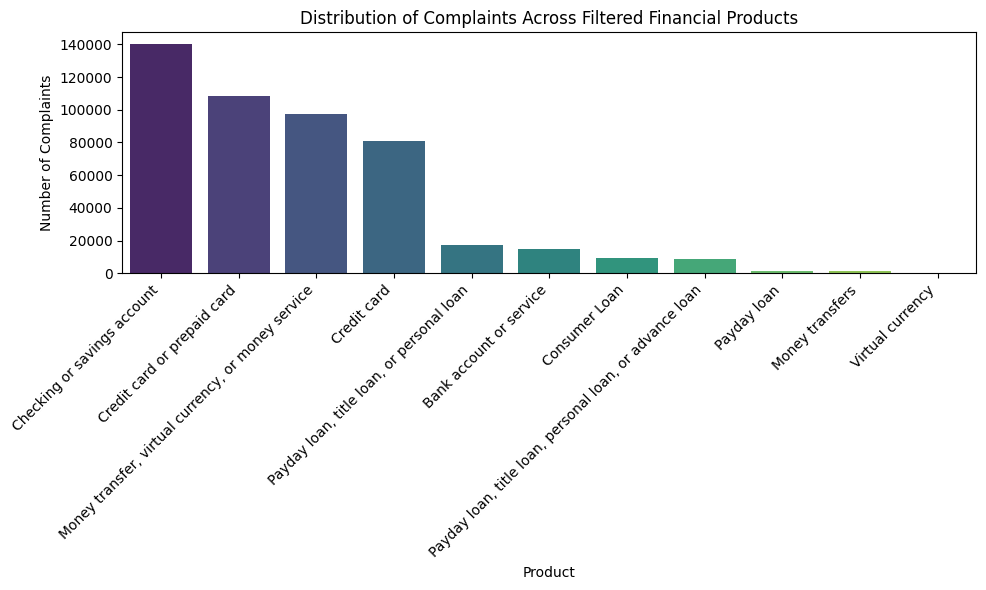

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of complaints per product
product_distribution = df_cleaned['Product'].value_counts()

print("Distribution of Complaints Across Products:")
print(product_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')
plt.title('Distribution of Complaints Across Filtered Financial Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

2. Distribution of Complaint Narrative Lengths

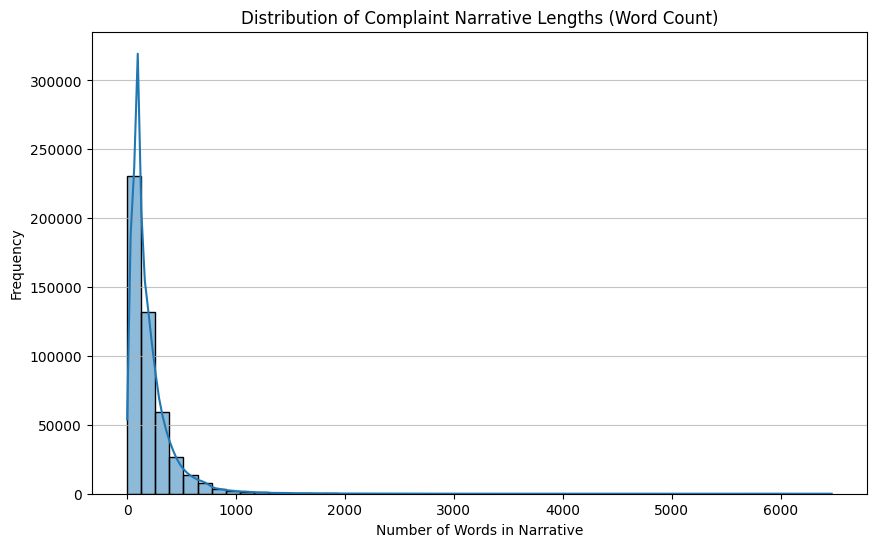


Summary Statistics for Narrative Length:
count    480580.000000
mean        205.575453
std         225.529209
min           1.000000
25%          82.000000
50%         137.000000
75%         256.000000
max        6469.000000
Name: narrative_length, dtype: float64


In [19]:
# Calculate the length of each narrative (word count)
df_cleaned['narrative_length'] = df_cleaned['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['narrative_length'], bins=50, kde=True) # Use kde=True for a smoothed curve
plt.title('Distribution of Complaint Narrative Lengths (Word Count)')
plt.xlabel('Number of Words in Narrative')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Also print some summary statistics for narrative length
print("\nSummary Statistics for Narrative Length:")
print(df_cleaned['narrative_length'].describe())

- Save cleaned file

In [20]:
import os

output_dir = f'{path_to_folder}/processed'
output_file_path = os.path.join(output_dir, 'filtered_complaints.csv')

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame to CSV in the specified Google Drive path
# Set index=False to avoid writing the DataFrame index as a column in the CSV
df_cleaned.to_csv(output_file_path, index=False)

print(f"\nFiltered and cleaned data saved to: {output_file_path}")


Filtered and cleaned data saved to: /content/drive/My Drive/rag-powered-chatbot/processed/filtered_complaints.csv
